<a href="https://colab.research.google.com/github/levchenkopavlo/AI/blob/master/14_%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%83%D0%BB%D1%8F%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D1%96%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів

In [ ]:
import torch
import pandas as pd

device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

Дані про розпад протонів

[посилання](https://www.kaggle.com/datasets/fedesoriano/multijet-primary-dataset)

In [ ]:
# трохи обробки даних
df = pd.read_csv('https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/MultiJetRun2010B.csv')

df = df[df['nBJets'] != 2]

columns = df.columns.delete(-1)
data = df[columns]
df[columns] = (data - data.min()) / (data.max() - data.min())

Дані погано збалансовані

In [ ]:
df['nBJets'].value_counts()

,count
nBJets,
0,20615
1,1056


In [ ]:
df.head()

,Run,Lumi,Event,MR,Rsq,E1,Px1,Py1,Pz1,E2,Px2,Py2,Pz2,HT,MET,nJets,nBJets
0,0.082072,0.0,0.000002,0.077191,0.041860,0.044618,0.342725,0.531326,0.480732,0.055588,0.696681,0.457241,0.440224,0.061659,0.043047,0.0,0
1,0.082072,0.0,0.000006,0.052182,0.055190,0.018690,0.493614,0.585784,0.491979,0.017684,0.567978,0.430552,0.474613,0.025133,0.034687,0.0,0
2,0.082072,0.0,0.000015,0.154156,0.035263,0.101251,0.540018,0.671386,0.470196,0.273968,0.533484,0.338381,0.325311,0.165718,0.059381,0.2,0
3,0.082072,0.0,0.000048,0.106599,0.123328,0.063472,0.306290,0.523352,0.483465,0.039306,0.713922,0.422854,0.493248,0.101707,0.108566,0.0,0
4,0.082072,0.0,0.000063,0.072599,0.024611,0.383563,0.508826,0.564737,0.292545,0.224039,0.550834,0.433906,0.361549,0.110721,0.018941,0.2,0


In [ ]:
print('dimensions: ', df.shape, end='\n\n')
print(df.columns, end='\n\n')
print('types of columns:\n',df.dtypes, end='\n\n', sep='')
print('missing values:\n', df.isnull().sum().to_string(), end='\n\n', sep='')
df.describe()

dimensions:  (21671, 17)

Index(['Run', 'Lumi', 'Event', 'MR', 'Rsq', 'E1', 'Px1', 'Py1', 'Pz1', 'E2',
       'Px2', 'Py2', 'Pz2', 'HT', 'MET', 'nJets', 'nBJets'],
      dtype='object')

types of columns:
Run       float64
Lumi      float64
Event     float64
MR        float64
Rsq       float64
E1        float64
Px1       float64
Py1       float64
Pz1       float64
E2        float64
Px2       float64
Py2       float64
Pz2       float64
HT        float64
MET       float64
nJets     float64
nBJets      int64
dtype: object

missing values:
Run       0
Lumi      0
Event     0
MR        0
Rsq       0
E1        0
Px1       0
Py1       0
Pz1       0
E2        0
Px2       0
Py2       0
Pz2       0
HT        0
MET       0
nJets     0
nBJets    0



,Run,Lumi,Event,MR,Rsq,E1,Px1,Py1,Pz1,E2,Px2,Py2,Pz2,HT,MET,nJets,nBJets
count,21671.000000,21671.000000,21671.000000,21671.000000,21671.000000,21671.000000,21671.000000,21671.000000,21671.000000,21671.000000,21671.000000,21671.000000,21671.000000,21671.000000,21671.000000,21671.000000,21671.000000
mean,0.589871,0.362211,0.400658,0.133954,0.030418,0.122689,0.429790,0.580307,0.493093,0.130720,0.632930,0.418893,0.473195,0.090376,0.037575,0.086973,0.048729
std,0.474948,0.350643,0.341575,0.080616,0.030469,0.108996,0.072393,0.081103,0.083636,0.114940,0.069375,0.069113,0.092479,0.058649,0.025460,0.130964,0.215305
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.082072,0.052966,0.139368,0.083103,0.010340,0.047929,0.367607,0.511898,0.458072,0.047111,0.576027,0.362469,0.429388,0.053844,0.020149,0.000000,0.000000
50%,1.000000,0.422316,0.477140,0.109356,0.021996,0.081313,0.429424,0.580760,0.493824,0.089977,0.632756,0.418001,0.473217,0.076526,0.032929,0.000000,0.000000
75%,1.000000,0.431497,0.486801,0.156795,0.041364,0.160326,0.491587,0.649121,0.528338,0.180375,0.690159,0.475493,0.517234,0.110400,0.049581,0.200000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Потрібно на основі інформації про розпад спрогнозувати наявність високоенергетичного випромінювання `nBJets`

# Завдання 1
Створіть клас Dataset для тренувальних та тестових даних

In [ ]:
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split

class MyDataset(Dataset):
    def __init__(self, X, y):
      self.X = torch.FloatTensor(X.values)
      self.y = torch.FloatTensor(y.values)
      self.y = self.y.reshape(-1, 1)

    def __len__(self):
      return len(self.X)

    def __getitem__(self, idx):
      return self.X[idx], self.y[idx]

# Create dataset object
X = df.drop(columns=['nBJets'])
y = df['nBJets']

dataset = MyDataset(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=42,
                                                    stratify=y)

dataset_train = MyDataset(X_train, y_train)
dataset_test = MyDataset(X_test, y_test)

# Завдання 2
Створіть DataLoader

In [ ]:
from torch.utils.data import DataLoader

batch_size = 128
train_dl = DataLoader(dataset_train,  # датасет з даними
                      batch_size=batch_size,  # кількість даних в одному пакеті
                      shuffle=True)  # чи треба перемішувати дані)

test_dl = DataLoader(dataset_test,  # датасет з даними
                     batch_size=batch_size,  # кількість даних в одному пакеті
                     shuffle=True)  # чи треба перемішувати дані)

# Завдання 3
Створіть нейромережу

In [ ]:
from torch import nn
import numpy as np
import torch.nn.functional as F

class BinaryClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()

        self.all_layers = nn.Sequential(
          # Block(input_dim, hidden_dim),
          # nn.Dropout(0.2),
          # Block(hidden_dim, hidden_dim//2),

          nn.Linear(input_dim, hidden_dim),
          nn.Dropout(0.2),
          nn.Linear(hidden_dim, hidden_dim//2),
          nn.ReLU(),
          nn.Linear(hidden_dim//2, hidden_dim//4),
          nn.ReLU(),
          nn.Linear(hidden_dim//4, hidden_dim//8),
          nn.ReLU(),
          nn.Linear(hidden_dim//8, output_dim)
        )

    def forward(self, x):
        return self.all_layers(x)


    def predict(self, X, device='cpu'):
        X = torch.FloatTensor(np.array(X)).to(device)

        with torch.no_grad():
          y_pred = self.forward(X)
          y_pred = F.sigmoid(y_pred)

        return y_pred.cpu().numpy().squeeze()


model = BinaryClassifier(16, 256, 1).to(device)
model

BinaryClassifier(
  (all_layers): Sequential(
    (0): Linear(in_features=16, out_features=256, bias=True)
    (1): Dropout(p=0.2, inplace=False)
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): ReLU()
    (8): Linear(in_features=32, out_features=1, bias=True)
  )
)

In [ ]:
from torchsummary import summary

summary(model, input_size=(16,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 256]           4,352
           Dropout-2                  [-1, 256]               0
            Linear-3                  [-1, 128]          32,896
              ReLU-4                  [-1, 128]               0
            Linear-5                   [-1, 64]           8,256
              ReLU-6                   [-1, 64]               0
            Linear-7                   [-1, 32]           2,080
              ReLU-8                   [-1, 32]               0
            Linear-9                    [-1, 1]              33
Total params: 47,617
Trainable params: 47,617
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.18
Estimated Total Size (MB): 0.19
---------------------------------------------

# Завдання 4
Визначте функцію втрат та оптимізатор, можливо графік швидкості навчання

In [ ]:
# Функція втрат середньоквадратичної помилки (BCE) для регресії
num0 = sum(y_train == 0)
num1 = sum(y_train == 1)
loss_fn = nn.BCEWithLogitsLoss(pos_weight=torch.tensor(num0/num1))

# Оптимізатор (Adam) для оновлення ваг моделі
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-2, weight_decay=0)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=0)

In [ ]:
from torch.optim.lr_scheduler import StepLR

# scheduler = StepLR(optimizer, step_size=5, gamma=0.1)
scheduler = StepLR(optimizer, step_size=50, gamma=0.1)

# Завдання 5
Натренуйте нейромережу.

In [ ]:
# @title Функція для тренування
import time

def train(model, optimizer, loss_fn, train_dl, val_dl,
          metrics=None, metrics_name=None, epochs=20, device='cpu', task='regression'):
    '''
    Runs training loop for classification problems. Returns Keras-style
    per-epoch history of loss and accuracy over training and validation data.

    Parameters
    ----------
    model : nn.Module
        Neural network model
    optimizer : torch.optim.Optimizer
        Search space optimizer (e.g. Adam)
    loss_fn :
        Loss function (e.g. nn.CrossEntropyLoss())
    train_dl :
        Iterable dataloader for training data.
    val_dl :
        Iterable dataloader for validation data.
    metrics: list
        List of sklearn metrics functions to be calculated
    metrics_name: list
        List of matrics names
    epochs : int
        Number of epochs to run
    device : string
        Specifies 'cuda' or 'cpu'
    task : string
        type of problem. It can be regression, binary or multiclass

    Returns
    -------
    Dictionary
        Similar to Keras' fit(), the output dictionary contains per-epoch
        history of training loss, training accuracy, validation loss, and
        validation accuracy.
    '''

    print('train() called: model=%s, opt=%s(lr=%f), epochs=%d, device=%s\n' % \
          (type(model).__name__, type(optimizer).__name__,
           optimizer.param_groups[0]['lr'], epochs, device))

    metrics = metrics if metrics else []
    metrics_name = metrics_name if metrics_name else [metric.__name__ for metric in metrics]

    history = {} # Collects per-epoch loss and metrics like Keras' fit().
    history['lr'] = []
    history['loss'] = []
    history['val_loss'] = []
    for name in metrics_name:
        history[name] = []
        history[f'val_{name}'] = []

    start_time_train = time.time()

    for epoch in range(epochs):

        # --- TRAIN AND EVALUATE ON TRAINING SET -----------------------------
        start_time_epoch = time.time()

        model.train()
        history_train = {name: 0 for name in ['loss']+metrics_name}

        for batch in train_dl:
            x    = batch[0].to(device)
            y    = batch[1].to(device)
            y_pred = model(x)
            loss = loss_fn(y_pred, y)
            y_pred = F.sigmoid(y_pred)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            y_pred = y_pred.detach().cpu().numpy()
            y = y.detach().cpu().numpy()

            history_train['loss'] += loss.item() * x.size(0)
            for name, func in zip(metrics_name, metrics):
              try:
                  history_train[name] += func(y, y_pred) * x.size(0)
              except:
                  if task == 'binary': y_pred_ = y_pred.round()
                  elif task == 'multiclass': y_pred_ = y_pred.argmax(axis=-1)
                  history_train[name] += func(y, y_pred_) * x.size(0)

        for name in history_train:
            history_train[name] /= len(train_dl.dataset)

        scheduler.step()
        history['lr'].append(scheduler.get_last_lr())


        # --- EVALUATE ON VALIDATION SET -------------------------------------
        model.eval()
        history_val = {'val_' + name: 0 for name in metrics_name+['loss']}

        with torch.no_grad():
            for batch in val_dl:
                x    = batch[0].to(device)
                y    = batch[1].to(device)
                y_pred = model(x)
                loss = loss_fn(y_pred, y)
                y_pred = F.sigmoid(y_pred)

                y_pred = y_pred.cpu().numpy()
                y = y.cpu().numpy()

                history_val['val_loss'] += loss.item() * x.size(0)
                for name, func in zip(metrics_name, metrics):
                    try:
                        history_val['val_'+name] += func(y, y_pred) * x.size(0)
                    except:
                        if task == 'binary': y_pred_ = y_pred.round()
                        elif task == 'multiclass': y_pred_ = y_pred.argmax(axis=-1)

                        history_val['val_'+name] += func(y, y_pred_) * x.size(0)

        for name in history_val:
            history_val[name] /= len(val_dl.dataset)

        # PRINTING RESULTS

        end_time_epoch = time.time()

        for name in history_train:
            history[name].append(history_train[name])
            history['val_'+name].append(history_val['val_'+name])

        total_time_epoch = end_time_epoch - start_time_epoch

        print(f'Epoch {epoch+1:4d} {total_time_epoch:4.0f}sec', end='\t')
        for name in history_train:
            print(f'{name}: {history[name][-1]:10.3g}', end='\t')
            print(f"val_{name}: {history['val_'+name][-1]:10.3g}", end='\t')
        print()

    # END OF TRAINING LOOP

    end_time_train       = time.time()
    total_time_train     = end_time_train - start_time_train
    print()
    print('Time total:     %5.2f sec' % (total_time_train))

    return history

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

history = train(model, optimizer, loss_fn, train_dl, test_dl,
                epochs=40,
                metrics=[accuracy_score],
                device=device,
                task='binary')

train() called: model=BinaryClassifier, opt=Adam(lr=0.000100), epochs=40, device=cpu

Epoch    1    4sec	loss:       1.32	val_loss:       1.32	accuracy_score:     0.0487	val_accuracy_score:     0.0487	
Epoch    2    4sec	loss:       1.32	val_loss:       1.32	accuracy_score:     0.0488	val_accuracy_score:     0.0487	
Epoch    3    3sec	loss:       1.32	val_loss:       1.32	accuracy_score:     0.0729	val_accuracy_score:     0.0701	
Epoch    4    2sec	loss:       1.32	val_loss:       1.32	accuracy_score:      0.473	val_accuracy_score:       0.43	
Epoch    5    2sec	loss:       1.32	val_loss:       1.32	accuracy_score:      0.363	val_accuracy_score:      0.762	
Epoch    6    1sec	loss:       1.32	val_loss:       1.32	accuracy_score:      0.714	val_accuracy_score:      0.461	
Epoch    7    1sec	loss:       1.32	val_loss:       1.32	accuracy_score:      0.482	val_accuracy_score:      0.593	
Epoch    8    1sec	loss:       1.32	val_loss:       1.32	accuracy_score:      0.583	val_accuracy_score

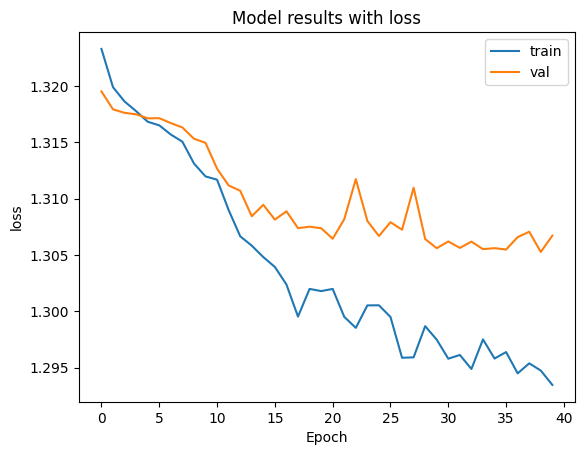

In [ ]:
import matplotlib.pyplot as plt

def plot_metric(history, name):
  plt.title(f"Model results with {name}")
  plt.plot(history[name], label='train')
  plt.plot(history['val_'+name], label='val')
  plt.xlabel('Epoch')
  plt.ylabel(name)
  plt.legend()


plot_metric(history, 'loss')

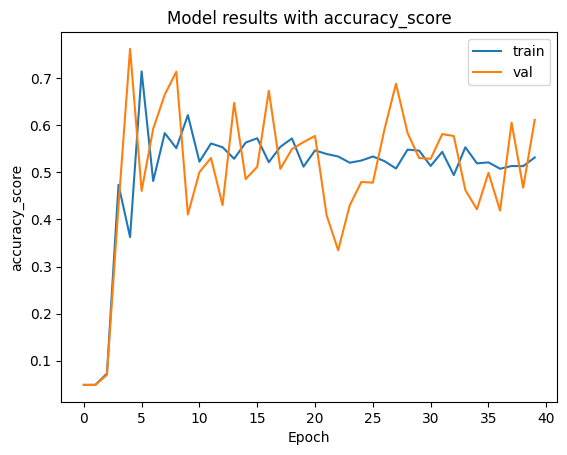

In [ ]:
plot_metric(history, 'accuracy_score')

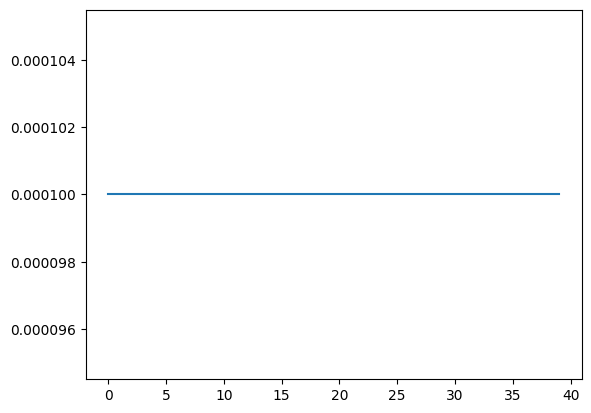

In [ ]:
plt.plot(history['lr'])

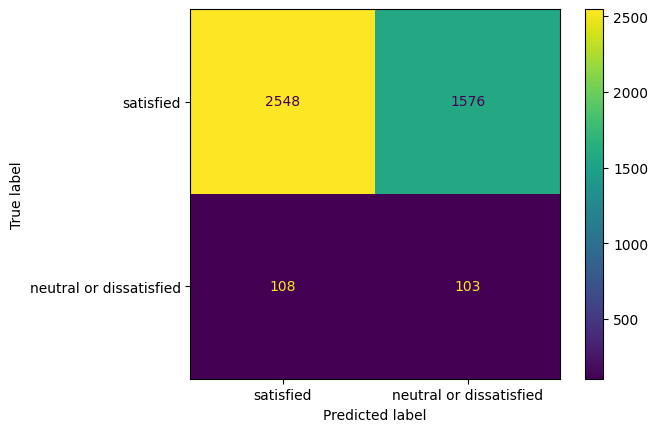

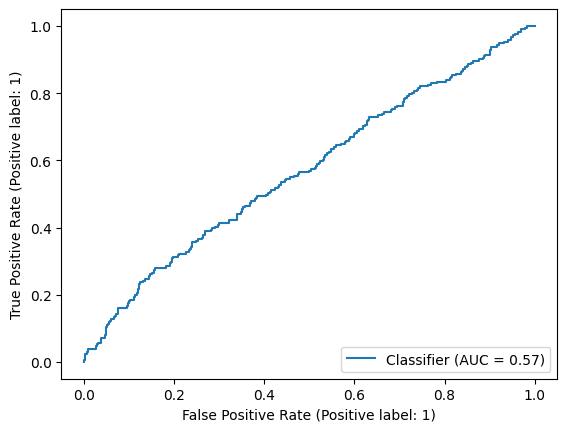

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

model = model.to('cpu')  # відключаємо від gpu
model.eval()  # відключення dropout та batchnormalization
y_pred = model.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred.round(),
                                        display_labels=['satisfied', 'neutral or dissatisfied'])
plt.plot()

RocCurveDisplay.from_predictions(y_test, y_pred, pos_label=1)

# Завдання 6
Збережіть нейромережу та зробіть прогноз